In [35]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
phy_res=pd.read_csv('gdrive/My Drive/Colab Notebooks/Lab 2/Phytoplankton_results_tab.csv')
phy_res

,Phytoplankton Monitoring Programme results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessot...,Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Alexandrium spp. (PSP) - 40 cells/litre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878,Dinophysiaceae/Prorocentrum lima (DSP) - 100 c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
879,"Pseudo-nitzschia spp. (ASP) - 150,000 cells/litre",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,Phytoplankton cell count ? trigger Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
new_header = phy_res.iloc[0] #grab the first row for the header
phy_res=phy_res[1:]  #take the data less the header row
phy_res.columns = new_header  #set the header row as the df header

In [38]:
phy_res=phy_res[:828] # Need to change this for Q.5

In [ ]:
# phy_res=phy_res[:414] # Changed this for Q.5

In [39]:
phy_res

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,06/01/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,853/21,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,25/10/2021,ND,40,ND,7080,ND,ND,ND,NaN,NaN
825,854/21,Crouch,B015Y,Maldon DC,TQ90429738,Althorne,26/10/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
826,855/21,Lyme Bay,B090M,Torbay BC,UNVERIFIED,Site 1,25/10/2021,ND,40,ND,ND,ND,ND,ND,NaN,NaN
827,856/21,Burry Inlet,B038I,City and Council of Swansea,SS50509590,South East 4,27/10/2021,ND,ND,ND,ND,ND,ND,ND,NaN,NaN


In [40]:
def clean_data(phy_res):
    phy_res["Alexandrium spp. \ncells L-1\n(PSP)"] = phy_res["Alexandrium spp. \ncells L-1\n(PSP)"].replace("ND", 0)
    phy_res["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = phy_res["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace("ND", 0)
    phy_res["Dinophysiaceae \ncells L-1\n(DSP)"] = phy_res["Dinophysiaceae \ncells L-1\n(DSP)"].replace("ND", 0)
    phy_res["Prorocentrum lima \ncells L-1\n(DSP)"] = phy_res["Prorocentrum lima \ncells L-1\n(DSP)"].replace("ND", 0)

    phy_res["Alexandrium spp. \ncells L-1\n(PSP)"] = phy_res["Alexandrium spp. \ncells L-1\n(PSP)"].replace(np.nan, -1)
    phy_res["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = phy_res["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace(np.nan, -1)
    phy_res["Dinophysiaceae \ncells L-1\n(DSP)"] = phy_res["Dinophysiaceae \ncells L-1\n(DSP)"].replace(np.nan, -1)
    phy_res["Prorocentrum lima \ncells L-1\n(DSP)"] = phy_res["Prorocentrum lima \ncells L-1\n(DSP)"].replace(np.nan, -1)

    phy_res["Alexandrium spp. \ncells L-1\n(PSP)"] = pd.to_numeric(phy_res["Alexandrium spp. \ncells L-1\n(PSP)"], errors='coerce')
    phy_res["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = pd.to_numeric(phy_res["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "], errors='coerce')
    phy_res["Dinophysiaceae \ncells L-1\n(DSP)"] = pd.to_numeric(phy_res["Dinophysiaceae \ncells L-1\n(DSP)"], errors='coerce')
    phy_res["Prorocentrum lima \ncells L-1\n(DSP)"] = pd.to_numeric(phy_res["Prorocentrum lima \ncells L-1\n(DSP)"], errors='coerce')
    
    phy_res["Alexandrium spp. \ncells L-1\n(PSP)"] = phy_res["Alexandrium spp. \ncells L-1\n(PSP)"].fillna(-1)
    phy_res["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = phy_res["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].fillna(-1)
    phy_res["Dinophysiaceae \ncells L-1\n(DSP)"] = phy_res["Dinophysiaceae \ncells L-1\n(DSP)"].fillna(-1)
    phy_res["Prorocentrum lima \ncells L-1\n(DSP)"] = phy_res["Prorocentrum lima \ncells L-1\n(DSP)"].fillna(-1)

    phy_res["Alexandrium spp. \ncells L-1\n(PSP)"] = phy_res["Alexandrium spp. \ncells L-1\n(PSP)"].replace(" ", -1)
    phy_res["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = phy_res["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace(" ", -1)
    phy_res["Dinophysiaceae \ncells L-1\n(DSP)"] = phy_res["Dinophysiaceae \ncells L-1\n(DSP)"].replace(" ", -1)
    phy_res["Prorocentrum lima \ncells L-1\n(DSP)"] = phy_res["Prorocentrum lima \ncells L-1\n(DSP)"].replace(" ", -1)

# Cleaning the other columns:

    phy_res["Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)"] = phy_res["Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)"].replace("ND", 0)
    phy_res["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "] = phy_res["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "].replace("ND", 0)
    phy_res["Prorocentrum cordatum \ncells L-1\n(Venerupin) "] = phy_res["Prorocentrum cordatum \ncells L-1\n(Venerupin) "].replace("ND", 0)
   

    phy_res["Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)"] = pd.to_numeric(phy_res["Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)"], errors='coerce')
    phy_res["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "] = pd.to_numeric(phy_res["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "], errors='coerce')
    phy_res["Prorocentrum cordatum \ncells L-1\n(Venerupin) "] = pd.to_numeric(phy_res["Prorocentrum cordatum \ncells L-1\n(Venerupin) "], errors='coerce')

    phy_res["Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)"] = phy_res["Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)"].fillna(-1)
    phy_res["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "] = phy_res["Protoceratium reticulatum \ncells L-1\n(Yessotoxin) "].fillna(-1)
    phy_res["Prorocentrum cordatum \ncells L-1\n(Venerupin) "] = phy_res["Prorocentrum cordatum \ncells L-1\n(Venerupin) "].fillna(-1)


In [41]:
clean_data(phy_res)

In [42]:
# indicating the thresholds:
thresholds = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, "Dinophysiaceae \ncells L-1\n(DSP)" : 100, "Prorocentrum lima \ncells L-1\n(DSP)" : 100, "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000}

In [43]:
phy_res

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,0.0,0.0,0.0,400.0,0.0,0.0,0.0,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,06/01/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,853/21,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,25/10/2021,0.0,40.0,0.0,7080.0,0.0,0.0,0.0,NaN,NaN
825,854/21,Crouch,B015Y,Maldon DC,TQ90429738,Althorne,26/10/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
826,855/21,Lyme Bay,B090M,Torbay BC,UNVERIFIED,Site 1,25/10/2021,0.0,40.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
827,856/21,Burry Inlet,B038I,City and Council of Swansea,SS50509590,South East 4,27/10/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [44]:
def check_thresholds(phy_res):
    t = []
    for i,j in enumerate(phy_res["Sample number"]):
        alexandrium = phy_res.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"]
        pseudo_nitzschia = phy_res.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]
        dinophysiaceae = phy_res.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"]
        prorocentrum = phy_res.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]
        threshold_reached = 0
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:
            threshold_reached = 1
        elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]:
            threshold_reached = 1

        t.append(threshold_reached)

    return t


In [45]:
phy_res
thresholds_reached = check_thresholds(phy_res)
phy_res['thresholds_reached'] = thresholds_reached

pd.DataFrame.to_csv(phy_res,'gdrive/My Drive/Colab Notebooks/Lab 2/thresholds_cleaned.csv', sep=',', index=False)

In [46]:
x = pd.read_csv('gdrive/My Drive/Colab Notebooks/Lab 2/thresholds_cleaned.csv',  usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)"], na_values = ['no info', '.'])
y = pd.read_csv('gdrive/My Drive/Colab Notebooks/Lab 2/thresholds_cleaned.csv', usecols=["thresholds_reached"])

In [47]:
x

,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP)
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,400.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
823,0.0,40.0,0.0,7080.0
824,0.0,0.0,0.0,0.0
825,0.0,40.0,0.0,0.0
826,0.0,0.0,0.0,0.0


In [48]:
y

,thresholds_reached
0,0
1,0
2,0
3,0
4,0
...,...
823,0
824,0
825,0
826,0


In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

In [50]:
# This is for Qs 4
# model = Sequential()
# model.add(Dense(units=1000, activation='sigmoid', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='Adadelta',
#  metrics=['accuracy'])

In [51]:
# Also Q.4. Might also need to report time.
# model = Sequential()
# model.add(Dense(units=1000, activation='relu', input_shape=(4, ))) #this is the input layer.
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='relu')) #This is the output layer

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='RMSprop',
#  metrics=['accuracy'])

In [ ]:
# Also Q.4 4 hidden layers
# model = Sequential()
# model.add(Dense(units=1000, activation='relu', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='relu'))

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='Adam',
#  metrics=['accuracy'])

In [139]:

# model = Sequential()
# model.add(Dense(units=1000, activation='tanh', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='tanh'))

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='Adam',
#  metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1000)              5000      
                                                                 
 dropout_19 (Dropout)        (None, 1000)              0         
                                                                 
 dense_27 (Dense)            (None, 5)                 5005      
                                                                 
 dropout_20 (Dropout)        (None, 5)                 0         
                                                                 
 dense_28 (Dense)            (None, 5)                 30        
                                                                 
 dropout_21 (Dropout)        (None, 5)                 0         
                                                                 
 dense_29 (Dense)            (None, 5)                

In [ ]:
#5 hidden layers
# model = Sequential()
# model.add(Dense(units=1000, activation='relu', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='relu'))

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='Adam',
#  metrics=['accuracy'])

In [ ]:
# 5 hidden layers
# model = Sequential()
# model.add(Dense(units=1000, activation='tanh', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='tanh'))

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='Adam',
#  metrics=['accuracy'])

In [ ]:
# model = Sequential()
# model.add(Dense(units=1000, activation='sigmoid', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='Adam',
#  metrics=['accuracy'])

In [204]:

# model = Sequential()
# model.add(Dense(units=1000, activation='sigmoid', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='RMSprop',
#  metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 1000)              5000      
                                                                 
 dropout_35 (Dropout)        (None, 1000)              0         
                                                                 
 dense_47 (Dense)            (None, 5)                 5005      
                                                                 
 dropout_36 (Dropout)        (None, 5)                 0         
                                                                 
 dense_48 (Dense)            (None, 5)                 30        
                                                                 
 dropout_37 (Dropout)        (None, 5)                 0         
                                                                 
 dense_49 (Dense)            (None, 5)               

In [205]:

# model = Sequential()
# model.add(Dense(units=1000, activation='relu', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='relu'))


# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='RMSprop',
#  metrics=['accuracy'])

In [206]:

# model = Sequential()
# model.add(Dense(units=1000, activation='tanh', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='tanh'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='tanh'))

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='SGD',
#  metrics=['accuracy'])

In [272]:

# model = Sequential()
# model.add(Dense(units=1000, activation='sigmoid', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(units=5, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='RMSprop',
#  metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 1000)              5000      
                                                                 
 dropout_51 (Dropout)        (None, 1000)              0         
                                                                 
 dense_68 (Dense)            (None, 5)                 5005      
                                                                 
 dropout_52 (Dropout)        (None, 5)                 0         
                                                                 
 dense_69 (Dense)            (None, 5)                 30        
                                                                 
 dropout_53 (Dropout)        (None, 5)                 0         
                                                                 
 dense_70 (Dense)            (None, 1)               

In [357]:

model = Sequential()
model.add(Dense(units=1000, activation='sigmoid', input_shape=(4, )))
model.add(Dropout(0.9))
model.add(Dense(units=5, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',
 optimizer='Adam',
 metrics=['accuracy'])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 1000)              5000      
                                                                 
 dropout_66 (Dropout)        (None, 1000)              0         
                                                                 
 dense_90 (Dense)            (None, 5)                 5005      
                                                                 
 dropout_67 (Dropout)        (None, 5)                 0         
                                                                 
 dense_91 (Dense)            (None, 1)                 6         
                                                                 
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [358]:

# model = Sequential()
# model.add(Dense(units=1000, activation='relu', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='relu'))

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='Adadelta',
#  metrics=['accuracy'])

In [359]:

# model = Sequential()
# model.add(Dense(units=1000, activation='relu', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='relu'))

# model.summary()
# model.compile(loss='binary_crossentropy',
#  optimizer='adam',
#  metrics=['accuracy'])

In [360]:

# model = Sequential()
# model.add(Dense(units=1000, activation='relu', input_shape=(4, )))
# model.add(Dropout(0.9))
# model.add(Dense(units=5, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='relu'))

# model.summary()
# model.compile(loss='categorical_crossentropy',
#  optimizer='adam',
#  metrics=['accuracy'])

In [361]:
%%time
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 1s 7ms/step - loss: 0.4419 - accuracy: 0.8278 - val_loss: 0.3546 - val_accuracy: 0.8916
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3728 - accuracy: 0.8792 - val_loss: 0.3505 - val_accuracy: 0.8916
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8837 - val_loss: 0.3454 - val_accuracy: 0.8916
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8807 - val_loss: 0.3325 - val_accuracy: 0.8916
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3546 - accuracy: 0.8897 - val_loss: 0.3081 - val_accuracy: 0.8916
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8867 - val_loss: 0.2874 - val_accuracy: 0.8916
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.9048 - val_loss: 0.2590 - val_accuracy: 0.9337
Epoch 8/10
42/42 [==

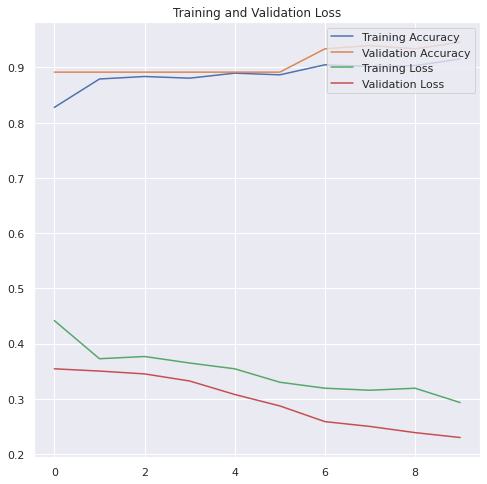

In [362]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(10) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 

In [363]:
print("Before OverSampling, counts of label '1': {}".format(sum(y["thresholds_reached"] == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y["thresholds_reached"] == 0)))

Before OverSampling, counts of label '1': 95
Before OverSampling, counts of label '0': 733 



In [364]:
from collections import Counter 
from sklearn.svm import LinearSVC 
from imblearn.pipeline import make_pipeline 
from imblearn.base import BaseSampler 
from imblearn.over_sampling import (SMOTE, RandomOverSampler) 
#!pip install imbalanced-learn 
import imblearn 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(x, y["thresholds_reached"].ravel())

In [365]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (1466, 4)
After OverSampling, the shape of train_y: (1466,) 

After OverSampling, counts of label '1': 733
After OverSampling, counts of label '0': 733


In [366]:
%%time
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
42/42 [==============================] - 0s 4ms/step - loss: 0.2735 - accuracy: 0.9169 - val_loss: 0.2221 - val_accuracy: 0.9458
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2738 - accuracy: 0.9184 - val_loss: 0.2166 - val_accuracy: 0.9398
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2736 - accuracy: 0.9169 - val_loss: 0.2114 - val_accuracy: 0.9398
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2621 - accuracy: 0.9230 - val_loss: 0.2062 - val_accuracy: 0.9458
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.9260 - val_loss: 0.2046 - val_accuracy: 0.9337
Epoch 6/10
42/42 [==============================] - 0s 4ms/step - loss: 0.2631 - accuracy: 0.9139 - val_loss: 0.2028 - val_accuracy: 0.9518
Epoch 7/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.9139 - val_loss: 0.2020 - val_accuracy: 0.9458
Epoch 8/10
42/42 [==

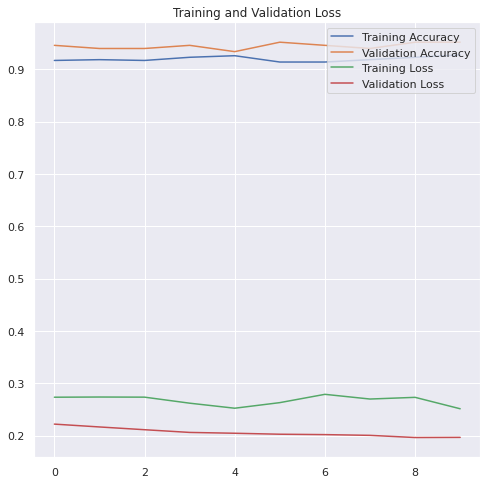

In [367]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs_range = range(10) 
plt.figure(figsize=(8, 8)) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.savefig("water_quality_nn.pdf", dpi=100) 
plt.show() 

0                                                   Alexandrium spp. \ncells L-1\n(PSP)  \
0                                                                                         
Alexandrium spp. \ncells L-1\n(PSP)                                            1.000000   
Dinophysiaceae \ncells L-1\n(DSP)                                              0.055174   
Prorocentrum lima \ncells L-1\n(DSP)                                          -0.008287   
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                                       0.019008   
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)                              -0.007551   
Protoceratium reticulatum \ncells L-1\n(Yessoto...                            -0.007628   
Prorocentrum cordatum \ncells L-1\n(Venerupin)                                -0.006579   
NaN                                                                                 NaN   
NaN                                                                                 NaN   

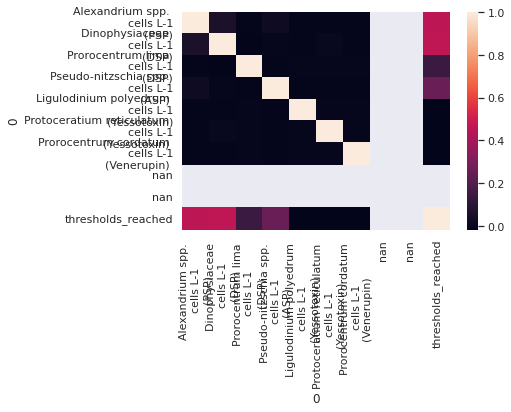

In [368]:
import numpy as np; np.random.seed(0) 
import seaborn as sns; sns.set_theme() 
corrMatrix = phy_res.corr() 
print (corrMatrix) 
ax = sns.heatmap(corrMatrix)